Notebook is copyright &copy; of <a href="https://ajaytech.co">Ajay Tech</a>.

# Gradient Descent

## Contents

- #### What is Gradient Descent
- #### Gradient Descent for Linear Regression
- #### Math
  - ##### Derivaties
  - ##### Partial Derivatives
- #### Gradient Descent for Linear Regression
- #### Stochastic Gradient Descent
- #### Mini-batch Gradient Descent



### What is Gradient Descent

In simple terms, Gradient Descent is an algorithm to **compute the minimum of a function**. OK - So, what is the big deal ? Well, most of the time in most machine learning algorithms, there is always a cost function that needs to be minimized. The best Machine Learning Algorithm is usually the one with the most inclusive and simple cost function. Once a cost function is defined, it is just a matter of solving for a minimum to arrive at the solution. That is why _Gradient Descent_ is extremely useful in the context of Machine learning. Let's see an example.

### Gradient Descent for Linear Regression

Let's start with the simplestML problem - Linear Regression. In the <a href="https://ajaytech.co/machine-learning-in-python/">Machine Learning in Python Tutorial</a>, we have covered <a href="https://ajaytech.co/python-regression/">Regression in Python</a> in great detail. 

Since the problem is simple enough to be solved mathematically, we have used the **OLS** (Ordinary Least Squares) technique to fit a straight line to the Linear Regression problem. You can view the <a href="https://ajaytech.co/python-regression/#Sum-of-Squares">equation for Ordinary Least Square </a> to solve linear regression here. What is the cost function in this case ?

picture here

**Cost function** = Sum of Squares of Residuals

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n {error}^2$ = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - \hat{y})^2$

The mathematical solution to minimize this cost function as derived by **OLS** is as follows. 

# $m_{slope} = \frac{\sum_{i=1}^n (y-\bar{y}) \times (x-\bar{x})}{ \sum_{i=1}^n (x-\bar{x})^2} $

where $\bar{x}$ represents the average of x and $\bar{y}$ represents the average of y 

However, when the number of independent variables increase, **OLS** is not a good solution. That is where **Gradient Descent** shines. While OLS is an analytical solution, Gradient Descent is a numerical solution. However, to understand _Gradient Descent_, we have to be conversant with the following concepts in Math. 

- Derivatives
- Partial Derivatives

### Math

#### Derivatives

A derivative is the slope of a function. Let's take a simple straight line - 

# $y = 2 \times x$ 

A simple dataset for this could be

- x = Number of DNA Samples
- y = Number of DNA pairs.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [ 2  4  6  8 10 12 14 16 18 20]


Text(3, 3, '2')

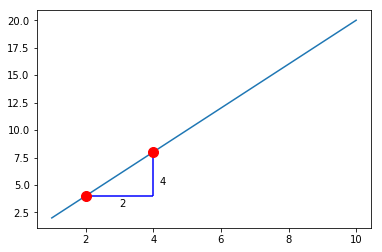

In [61]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x * 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,5,(y[3] - y[1]))
plt.text(3,3,(x[3] - x[1]))

# $slope = \frac {4}{2} = 2$

Mathematically, the slop of the equation $y = 2x$ is defined as

## $\frac{dy}{dx} = \frac {2 x} {x} = 2 $

And that's what you see as the **m** in $y = m x$

How about a second order equation ?

# $y = x^2$

A simple dataset for this could be

- x = Reach of a product
- y = Sales of the product.

Let's plot a sample dataset and try to compute the slope.

x =  [ 1  2  3  4  5  6  7  8  9 10]
y =  [  1   4   9  16  25  36  49  64  81 100]


Text(8.58, 45, 'slope = 14')

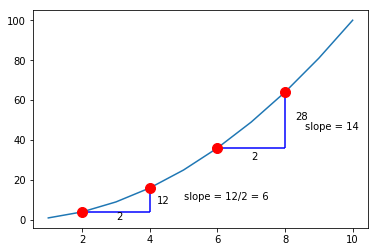

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = x ** 2

print ( "x = ",x)
print ( "y = ",y)

plt.plot(x,y)
plt.plot(x[1], y[1], marker='o', markersize=10, color="red")
plt.plot(x[3], y[3], marker='o', markersize=10, color="red")

plt.hlines(y=y[1], xmin=x[1], xmax=x[3], color='b')
plt.vlines(x=x[3], ymin=y[1], ymax=y[3], color='b')

plt.text(4.2,8,(y[3] - y[1]))
plt.text(3,0.0,(x[3] - x[1]))

plt.text(5,10,"slope = 12/2 = 6")

plt.plot(x[5], y[5], marker='o', markersize=10, color="red")
plt.plot(x[7], y[7], marker='o', markersize=10, color="red")

plt.hlines(y=y[5], xmin=x[5], xmax=x[7], color='b')
plt.vlines(x=x[7], ymin=y[5], ymax=y[7], color='b')

plt.text(8.3,50,(y[7] - y[5]))
plt.text(7,30,(x[7] - x[5]))

plt.text(8.58,45,"slope = 14")

In this case, the slope is not constant as measured by same metric as we have done previously. The slope seems to be changing with x. 

A correct way to define slope (or derivative) is to take an infinitesimally small increase in x and the corresponding value of y and divide them as before. Mathematically, it is defined as,

If $f(x)$ is a function of x, 

# $$\frac{d(f(x))}{dx} = Lim_{dx\to0} \frac{f(x + dx) - f(x)}{dx}$$


For example, if x = 4, increase x by a very small amount, say $\Delta = 0.0001$. Now, let's compute the value of y as well and plug them into the equation above

- $x$ = 4
- $dx$ = 0.0001

## $Lim_{dx\to0} \frac{(4 + 0.0001)^2 - 4^2}{0.0001} = \frac{0.0008}{0.0001} \approx 8 = 2 \times 4 = 2 \times x$

so, the derivative of $f(x) = x^2$ is $2x$ . We have not derived this mathematically - instead, we are trying to understanding with numbers, how a derivative works.

> **Derivative** represents the change in the value of a function with respect to the variable _(with which the derivative is being applied)_

#### Partial Derivatives

Partial derivatives are almost similar to regular derivatives - except that partial derivatives work only on a particular variable. For example, say the speed of a car is dependent on
- engine RPM
- slope of the road

## $speed = 8 \times x_{rpm} + 2 \times y_{slope}$

you can also write it as

## $z = 8x + 2y$

Now, how does the speed ($z$) of the car vary with a unit increase in the engine RPM ? The answer is 8 - pretty straightforward. That is represented mathematically using

## $\frac{\partial z}{\partial x} = \frac{\partial (8x + 2y)}{\partial x} = 8$

Let's take another example - The equation of a 2-d plane can be generalized as below

## $f(x,y) = 3x + 4y + 2$

You can visualize a plane like this - 

<img src="./pics/2d-plane.png"/>

As you can see, the plane intersects the z-axis at 2 ( Where the value of x & y are 0 ). Now, how far does the function vary, with a unit variation in x ? 

## $f(x,y)_{old} = 3 \times 1 + 4y + 2$

## $f(x,y)_{new} = 3 \times (1+.0001) + 4y + 2$

## $f(x,y)_{new} - f(x,y)_{old} = 0.0003$

For a unit change ( say 0.0001 in x ), the function changes by 0.0003. So, the differential change is $\frac {0.0003}{0.0001} = 3$

Mathematically, 

## $\frac{\partial f(x,y)}{\partial x} =\frac{\partial (3x + 5y + 2)}{\partial x} = 3$

Once again, I want you to take the intuitive meaning out of this - 

> For a unit change in x, the function changes by so much in the direction of x - That is a partial derivative. 

A plane is simple to understand. However, the interpretation would be the same even if it were a complicated curve in a 3-d space - Like a hill. 

### Gradient Descent for Linear Regression

Now that we understand derivaties (both regular and partial), we are ready to graduate to Gradient Descent. Imagine a set of data points like so. 

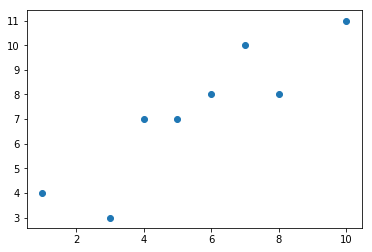

In [92]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.array([1,3,4,5,6,7,8,10])
y = np.array([4,3,7,7,8,10,8,11])

plt.scatter(x,y)

Say, we want to fit a straight line to this data set using <a href="https://ajaytech.co/python-regression">Linear Regression</a>. How would you do it ? Very simple

In [121]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

model.fit(x.reshape(-1,1),y) 

slope = model.coef_  
intercept   = model.intercept_

print ( "slope = ", slope)
print ( "intercept = ", intercept)


slope =  [0.84482759]
intercept =  2.6034482758620694


[2.60344828] [15.27586207]


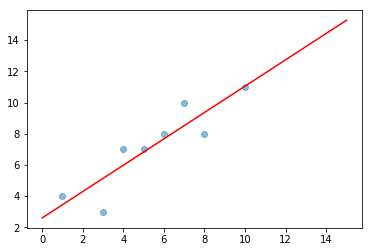

In [98]:
point_1 = slope*0 + intercept 
point_2 = slope*15 + intercept 
print ( point_1, point_2) 
plt.scatter( x,y,alpha=0.5)
plt.plot([0,15], [point_1,point_2],color="red")

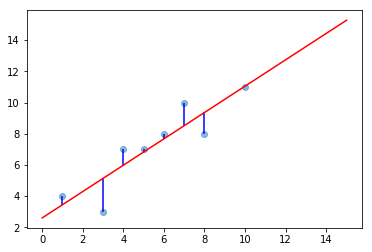

In [100]:
plt.scatter( x,y,alpha=0.5)
plt.plot([0,15], [point_1,point_2],color="red")

y_actual    = y
y_predicted = model.predict(x.reshape(-1,1))

for index,x_count in enumerate(x) :
    if y_actual[index] > y_predicted[index] :
        plt.vlines(x=x_count, ymin=y_predicted[index], ymax=y_actual[index], color='b')
    if y_actual[index] <= y_predicted[index] :
        plt.vlines(x=x_count, ymin=y_actual[index], ymax=y_predicted[index], color='b')

The blue lines represent the residuals (or errors). We can calculate the slope (and intercept) of the fit using OLS (Ordinary Least Squares) or using Gradient Descent. We already know how <a href="https://ajaytech.co/python-regression/#Sum-of-Squares">OLS works in Linear Regression</a>. We will see how Gradient Descent works. The equation for a straight line that would fit all the data points is some variation of 

## $y = m x + b$

where 
- m = slope
- b = intercept

Either way, we are minimizing the _Sum of Squares of Errors_. We started out with the definition of this at the beginning of the chapter. 

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n {error}^2$ = $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - \hat{y})^2$

where 
- $y_i$ = actual value
- $\hat{y}$ = predicted value

Since we are using linear regression to predict the value of y, let's substitute $\hat{y}$ with the following.

# Cost function =  $\frac{1}{2 \times n} \sum_{i=1}^n (y_i - (mx + b))^2$

Just to make things simple, assume a value of intercept (b) to be fixed at 2.6 ( b = 2.6 as we have previously solved for it). Imagine that we chart the cost function with different values of slope(m).

In [130]:
n = len(y)

cost_function = []
m = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0]
for slope in m : 
    cost = 0
    for i in range(n):
        cost = cost + (1/(2*n)) * ( (y_actual[i] - slope * x[i] - 2.6) ** 2 )
    cost_function.append(cost)

    


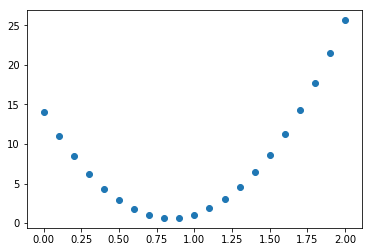

In [131]:
plt.scatter(m,cost_function)

Visually, we can eyeball the minimum value of the cost function to be somewhere around 0.8. This is inline with the scikit learn's LinearRegression model that we have solved above. 

But how to mathematically solve for this (without using Ordinary Least Squares) ? That is where Gradient Descent comes in. 

> Gradient Descent is a technique to find out the minimum of a function numerically.

Imagine a ball put at a random location on the cost curve shown above. 